In [10]:
import pandas as pd
import numpy as np

sales = pd.read_csv('sku_sales.csv')
sales.columns = ['sku_id','dc_id','date','quantity','vend','or_price','discount']

In [42]:
#date属性分析
print sales.head()
have_days=sales.sort_values(by=[ 'dc_id','sku_id','date'])
have_days['count']=pd.Series(1, index=have_days.index)
have_days=have_days.groupby(['dc_id','sku_id'])['count'].sum()

from datetime import date
from datetime import datetime
def period(time):
    time1=datetime.strptime(time.max(),"%Y-%m-%d")
    time2=datetime.strptime(time.min(),"%Y-%m-%d")
    return (time1-time2).days+1
have=sales.sort_values(by=[ 'dc_id','sku_id','date'])
have=have.groupby(['dc_id','sku_id'])['date'].agg(period)
a=pd.merge(have_days.reset_index(),have.reset_index(),how='outer',on=['dc_id','sku_id'])
a['q']=a['date']-a['count']
print a[a['q']%30!=0]

   sku_id  dc_id        date  quantity  vend  or_price  discount
0     637      0  2016-10-12       5.0   1.0  0.089886  7.858136
1     637      0  2017-09-24       1.0   1.0  0.089886  8.191933
2     637      3  2016-07-01       0.0   1.0       NaN       NaN
3     637      3  2016-08-03       2.0   1.0  0.089886  8.122392
4     637      3  2017-05-03       4.0   1.0  0.089886  8.136300
Empty DataFrame
Columns: [dc_id, sku_id, count, date, q]
Index: []


In [81]:
info=pd.read_csv('sku_info.csv')
info = pd.DataFrame(info.values, columns=['sku_id','first','second','third','brand'])
#print info.sort_values(by=['first','second','third','brand','sku_id'])
#print info.sort_values(by=['brand','third'])
aa=info.groupby('third')['sku_id'].unique().reset_index()
aa['type']=aa['sku_id'].map(lambda x:len(x))
print info[info.sku_id==1000]

     sku_id  first  second  third  brand
999    1000      1       7    179    137


In [66]:
attr=pd.read_csv('sku_attr.csv')
attr = pd.DataFrame(attr.values, columns=['sku_id','attr','attr_values'])
print attr.groupby('attr')['attr_values'].unique()

attr
1      [1525, 2617, 2618, 4326, 2615, 523, 1433, 3480...
2                                       [148, 2720, 693]
3      [4689, 4193, 4752, 4756, 4109, 991, 4363, 4755...
5                                       [878, 879, 2904]
6                             [81, 29, 3955, 3954, 2835]
7                                               [33, 34]
11                     [2345, 119, 58, 2344, 2343, 2913]
14                                                [4082]
15                                                [4059]
16                                            [879, 880]
17                                              [98, 97]
18                                      [981, 982, 1263]
19                                                [2525]
20                              [2119, 4629, 2117, 2118]
21                                            [737, 736]
22     [4177, 3461, 156, 3892, 3894, 174, 1263, 2724,...
24                                                [3861]
25                        

In [84]:
prom=pd.read_csv('sku_prom.csv')
prom = pd.DataFrame(prom.values, columns=['date','sku_id','third','prom_type'])
print prom.prom_type.unique()

[10L 6L 1L 4L]


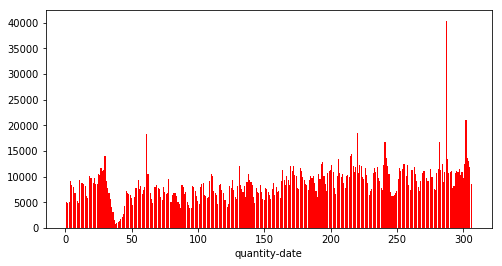

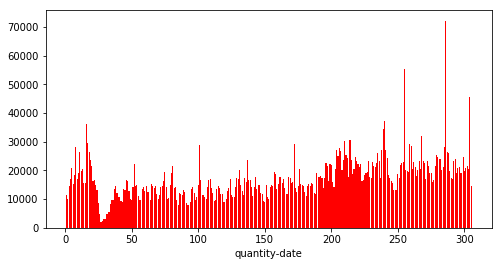

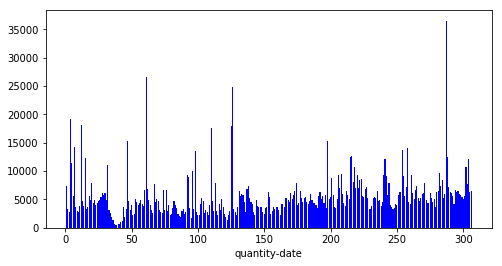

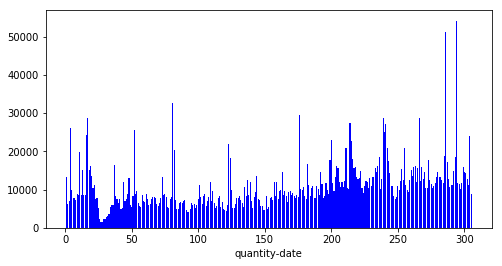

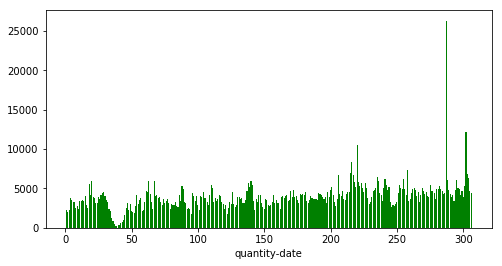

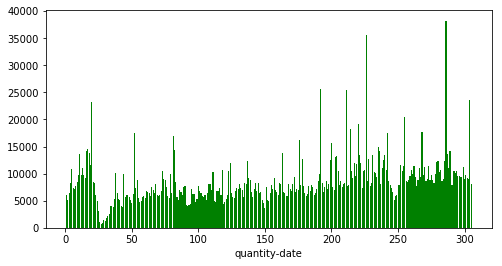

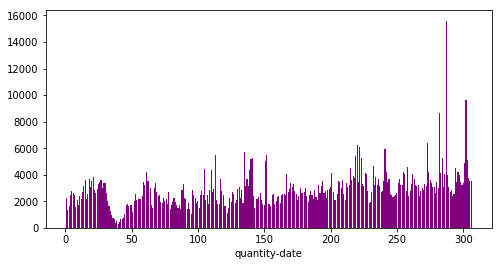

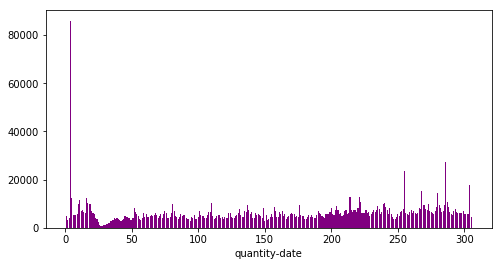

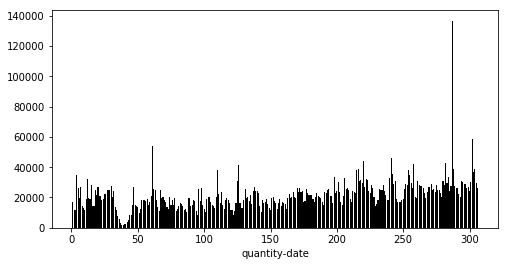

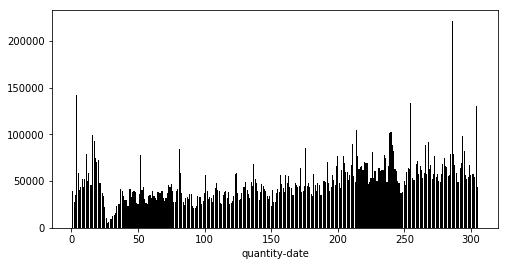

In [126]:
paint=sales.groupby(['date','dc_id'])['quantity'].sum().reset_index()
import matplotlib.pyplot as plt  
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY,YEARLY,MonthLocator
def pp(data,cc):
    fig=plt.figure(figsize=(8,4))
    x=[]
    y=[]
    qq=1
    for i in data.date:
        x.append(qq)
        qq+=1
        y.append(float(data[data.date==i].quantity))

    plt.xlabel("quantity-date")       
    #print x,y
    plt.bar(x,y,color=cc)  
    
    plt.show() 
pp(paint[(paint.dc_id==0)&(paint.date<='2016-12-31')],'red')
pp(paint[(paint.dc_id==0)&(paint.date>'2016-12-31')],'red')

pp(paint[(paint.dc_id==1)&(paint.date<='2016-12-31')],'blue')
pp(paint[(paint.dc_id==1)&(paint.date>'2016-12-31')],'blue')

pp(paint[(paint.dc_id==2)&(paint.date<='2016-12-31')],'green')
pp(paint[(paint.dc_id==2)&(paint.date>'2016-12-31')],'green')

pp(paint[(paint.dc_id==3)&(paint.date<='2016-12-31')],'purple')
pp(paint[(paint.dc_id==3)&(paint.date>'2016-12-31')],'purple')

paint1=sales.groupby('date')['quantity'].sum().reset_index()
pp(paint1[(paint1.date<='2016-12-31')],'black')
pp(paint1[(paint1.date>'2016-12-31')],'black')



In [133]:
test=pd.read_csv('sku_prom_testing_2018Jan.csv')
test=pd.DataFrame(test.values,columns=['date','sku_id','third','prom_type'])
print test.sort_values(by=['date','sku_id'])[test.sku_id==-999]

Empty DataFrame
Columns: [date, sku_id, third, prom_type]
Index: []


C:\Users\coding\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


         sku_id  dc_id        date  quantity  vend  or_price   discount
0           637      0  2016-10-12       5.0   1.0  0.089886   7.858136
1           637      0  2017-09-24       1.0   1.0  0.089886   8.191933
2           637      3  2016-07-01       0.0   1.0       NaN        NaN
3           637      3  2016-08-03       2.0   1.0  0.089886   8.122392
4           637      3  2017-05-03       4.0   1.0  0.089886   8.136300
5           937      1  2016-02-12       0.0   0.0       NaN        NaN
6           937      1  2017-02-01       0.0   0.0       NaN        NaN
7           937      1  2017-03-25       0.0   0.0       NaN        NaN
8           937      1  2017-04-24       0.0   1.0       NaN        NaN
9           937      4  2017-12-14       0.0   1.0       NaN        NaN
10          937      5  2017-12-28       0.0   1.0       NaN        NaN
11          937      0  2016-01-14       2.0   1.0  0.014877   5.000000
12          937      2  2016-03-09       0.0   0.0       NaN    